In [230]:
import pandas as pd
import numpy as np
from skbio.stats.composition import clr
import umap
import matplotlib.pyplot as plt
import seaborn as sns
import os
from itertools import combinations

sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})


DATA_DIR = '../../../data/onet_data/processed/measure/'
DATA_DIR_REFERENCE = '../../../data/onet_data/processed/reference/'

work_activities = pd.read_csv(os.path.join(DATA_DIR, 'WORK_ACTIVITIES.csv'))
work_context = pd.read_csv(os.path.join(DATA_DIR, 'WORK_CONTEXT.csv'))

# Reference data
occupation_data = pd.read_csv(os.path.join(DATA_DIR_REFERENCE, 'OCCUPATION_DATA.csv'))
# Create a dictionary to map occupation data to occupation titles
occ_code_dict = dict(zip(occupation_data['ONET_SOC_CODE'], occupation_data['TITLE']))
content_model_refrence = pd.read_csv(os.path.join(DATA_DIR_REFERENCE, 'CONTENT_MODEL_REFERENCE.csv'))
scale_reference = pd.read_csv(os.path.join(DATA_DIR_REFERENCE, 'SCALES_REFERENCE.csv'))
work_context_categories = pd.read_csv( os.path.join(DATA_DIR_REFERENCE, 'WORK_CONTEXT_CATEGORIES.csv') )


# Filter relevant elements
relevant_activities = {
    "4.A.1.b.2": "inspect_equip",           # Inspecting Equipment, Structures, or Materials
    "4.A.3.a.1": "physical_activities",     # Performing General Physical Activities
    "4.A.3.a.2": "handlingobjects",         # Handling and Moving Objects
    "4.A.3.a.3": "control_machines",        # Controlling Machines and Processes
    "4.A.3.a.4": "operate_equipment",       # Operating Vehicles, Mechanized Devices, or Equipment
    "4.A.3.b.4": "repair_mechequip",        # Repairing and Maintaining Mechanical Equipment
    "4.A.3.b.5": "repair_elecequip",        # Repairing and Maintaining Electronic Equipment
    "4.A.4.a.8": "dealwithpublic"           # Performing for or Working Directly with the Public
}

relevant_contexts = {
    "4.C.2.d.1.a" : ('sitting_continually', 4.5, 5.0),              # Spend Time Sitting"4.C.2.d.1.b" : ('standing_continually', 4.5, 5.0),# Spend Time Standing
    "4.C.2.d.1.g" : ('handsontools', 3.5, 5.0),                     # Spend Time Using Your Hands to Handle, Control, or Feel Objects, Tools, or Controls
    "4.C.2.a.1.c" : ('outdoors_everyday', 4.5, 5.0),                # Outdoors, Exposed to Weather
    "4.C.1.a.2.h" : ('email_lessthanmonthly', 1.0, 2.0),            # Electronic Mail
    "4.C.1.a.2.f" : ('telephone_lessthanmonthly', 1.0, 2.0),        # Telephone
    "4.C.2.d.1.c" : ('climbing_majority', 3.5, 5.0),                # Spend Time Climbing Ladders, Scaffolds, or Poles
    "4.C.2.d.1.d" : ('walking_majority', 3.5, 5.0),                 # Spend Time Walking and Running
    "4.C.2.d.1.e" : ('crouching_majority', 3.5, 5.0),               # Spend Time Kneeling, Crouching, Stooping, or Crawling
    "4.C.2.d.1.f" : ('keepingbalance_majority', 3.5, 5.0),          # Spend Time Keeping or Regaining Balance
    "4.C.2.d.1.h" : ('bendingbody_majority', 3.5, 5.0),             # Spend Time Bending or Twisting the Body
    "4.C.2.d.1.i" : ('repetitivemotion_majority', 3.5, 5.0),        # Spend Time Making Repetitive Motions
    "4.C.2.e.1.d" : ('safetyequip_majority', 3.5, 5.0),             # Wear Common Protective or Safety Equipment such as Safety Shoes, Glasses, Gloves, Hearing Protection, Hard Hats, or Life Jackets
    "4.C.1.a.4" : ('contactothers_majority', 3.5, 5.0),             # Contact With Others
    "4.C.1.b.1.f" : ('externalcustomer_veryimportant', 4.0, 5.0),   # Deal With External Customers
    "4.C.1.b.1.g" : ('coordothers_veryimportant', 4.0, 5.0),        # Coordinate or Lead Others
    "4.C.1.c.1" : ('othershealth_veryimportant', 4.0, 5.0),         # Responsible for Others' Health and Safety
    "4.C.1.d.3" : ('violentpeople_atleastweekly', 4.0, 5.0),        # Deal With Physically Aggressive People
    "4.C.2.a.1.b" : ('noac_everyday', 4.5, 5.0),                    # Indoors, Not Environmentally Controlled
    "4.C.2.a.3" : ('physicalclose_atleastmoderate', 4.0, 5.0),      # Physical Proximity
    "4.C.2.b.1.b" : ('extremetemp_everyday', 4.0, 5.0),             # Very Hot or Cold Temperatures
    "4.C.2.b.1.d" : ('contaminant_atleastweekly', 4.0, 5.0),        # Exposed to Contaminants
    "4.C.2.b.1.e" : ('crampedspace_everyday', 4.5, 5.0),            # Cramped Work Space, Awkward Positions
    "4.C.2.b.1.f" : ('bodyvibration_atleastweekly', 4.0, 5.0),      # Exposed to Whole Body Vibration
    "4.C.2.c.1.a" : ('radiation_atleastweekly', 4.0, 5.0),          # Exposed to Radiation
    "4.C.2.c.1.b" : ('disease_atleastweekly', 4.0, 5.0),            # Exposed to Disease or Infections
    "4.C.2.c.1.c" : ('highplace_atleastweekly', 4.0, 5.0),          # Exposed to High Places
    "4.C.2.c.1.d" : ('hazardcond_atleastweekly', 4.0, 5.0),         # Exposed to Hazardous Conditions
    "4.C.2.c.1.e" : ('hazardequip_atleastweekly', 4.0, 5.0),        # Exposed to Hazardous Equipment
    "4.C.2.c.1.f" : ('minorhurt_atleastweekly', 4.0, 5.0),          # Exposed to Minor Burns, Cuts, Bites, or Stings   
}


In [233]:
len(work_context.ELEMENT_ID.unique())

57

# JOB CHARACTERISTICS: WORK ACTIVITIES

In [231]:
work_activities_filtered = work_activities[
    (work_activities['ELEMENT_ID'].isin(relevant_activities.keys())) &
    (work_activities['SCALE_ID'] == "IM")
].copy()


work_activities_processed = work_activities_filtered.pivot(
    index='ONET_SOC_CODE',
    columns='ELEMENT_ID',
    values='DATA_VALUE'
).reset_index()

# work_activities_processed.loc[:, 'n'] = work_activities_processed.mean(axis=1)

work_activities_processed[list(relevant_activities.keys())] = (
    work_activities_processed[relevant_activities.keys()].ge(4) & 
    work_activities_processed[relevant_activities.keys()].le(5)
).astype(int)

work_activities_processed.rename(columns=relevant_activities, inplace=True)



work_context_filtered = work_context[
    (work_context['ELEMENT_ID'].isin(relevant_contexts.keys())) &
    (work_context['SCALE_ID'] == "CX")
].copy()


work_context_processed = work_context_filtered.pivot(
    index='ONET_SOC_CODE',
    columns='ELEMENT_ID',
    values='DATA_VALUE'
).reset_index()

# work_context_processed.loc[:, 'n'] = work_context_processed.mean(axis=1)

for context in relevant_contexts.keys():
    work_context_processed[context] = (
        work_context_processed[context].ge(relevant_contexts[context][1]) &
        work_context_processed[context].le(relevant_contexts[context][2])
    ).astype(int)

work_context_processed.rename(
        columns = lambda x : relevant_contexts[x][0] if x in relevant_contexts.keys() else x,
        inplace=True)

merged_data = work_activities_processed.merge(
    work_context_processed,on = 'ONET_SOC_CODE'
).merge(
    occupation_data[['ONET_SOC_CODE', 'TITLE']],
    on = 'ONET_SOC_CODE'
)

# Create teleworkable column
tele_vars = [
    "email_lessthanmonthly",
    "outdoors_everyday",
    "violentpeople_atleastweekly",
    "safetyequip_majority",
    "minorhurt_atleastweekly",
    "physical_activities",
    "handlingobjects",
    "control_machines",
    "operate_equipment",
    "dealwithpublic",
    "repair_mechequip",
    "repair_elecequip",
    "inspect_equip",
    "disease_atleastweekly",
    "walking_majority"
]

# Create teleworkable column
merged_data['TELEWORKABLE'] = (merged_data[tele_vars] == 0).all(axis=1).astype(int)

occupations_workathome = merged_data[['ONET_SOC_CODE', 'TITLE', 'TELEWORKABLE']]

occupations_workathome

,ONET_SOC_CODE,TITLE,TELEWORKABLE
0,11-1011.00,Chief Executives,1
1,11-1011.03,Chief Sustainability Officers,1
2,11-1021.00,General and Operations Managers,1
3,11-2011.00,Advertising and Promotions Managers,1
4,11-2021.00,Marketing Managers,1
...,...,...,...
874,53-7071.00,Gas Compressor and Gas Pumping Station Operators,0
875,53-7072.00,"Pump Operators, Except Wellhead Pumpers",0
876,53-7073.00,Wellhead Pumpers,0
877,53-7081.00,Refuse and Recyclable Material Collectors,0


In [10]:
# Load DingelNeiman-workathome data
url = "https://github.com/jdingel/DingelNeiman-workathome/blob/master/occ_onet_scores/output/occupations_workathome.csv?raw=true"
occupations_workathome_DN = pd.read_csv(url).rename(columns={
        'onetsoccode': 'ONET_SOC_CODE',
        "title" : "TITLE",
        "teleworkable": "TELEWORKABLE"
        })

occupations_workathome_DN

,ONET_SOC_CODE,TITLE,TELEWORKABLE
0,11-1011.00,Chief Executives,1
1,11-1011.03,Chief Sustainability Officers,1
2,11-1021.00,General and Operations Managers,1
3,11-2011.00,Advertising and Promotions Managers,1
4,11-2021.00,Marketing Managers,1
...,...,...,...
963,53-7072.00,"Pump Operators, Except Wellhead Pumpers",0
964,53-7073.00,Wellhead Pumpers,0
965,53-7081.00,Refuse and Recyclable Material Collectors,0
966,53-7111.00,Mine Shuttle Car Operators,0


In [20]:
merged_data.loc[
    merged_data.ONET_SOC_CODE == "51-6041.00",
    tele_vars
].T

,771
email_lessthanmonthly,0
outdoors_everyday,0
violentpeople_atleastweekly,0
safetyequip_majority,0
minorhurt_atleastweekly,0
physical_activities,0
handlingobjects,0
control_machines,0
operate_equipment,0
dealwithpublic,0


In [16]:
merged = occupations_workathome.merge(occupations_workathome_DN, on=['ONET_SOC_CODE'])
merged[merged['TELEWORKABLE_x'] != merged['TELEWORKABLE_y']]

,ONET_SOC_CODE,TITLE_x,TELEWORKABLE_x,TITLE_y,TELEWORKABLE_y
60,13-1131.00,Fundraisers,1,Fundraisers,0
73,13-2072.00,Loan Officers,1,Loan Officers,0
75,13-2082.00,Tax Preparers,1,Tax Preparers,0
92,17-2051.00,Civil Engineers,0,Civil Engineers,1
93,17-2051.01,Transportation Engineers,0,Transportation Engineers,1
99,17-2111.02,Fire-Prevention and Protection Engineers,0,Fire-Prevention and Protection Engineers,1
103,17-2141.00,Mechanical Engineers,1,Mechanical Engineers,0
110,17-2199.05,Mechatronics Engineers,0,Mechatronics Engineers,1
133,19-1023.00,Zoologists and Wildlife Biologists,0,Zoologists and Wildlife Biologists,1
136,19-1029.03,Geneticists,0,Geneticists,1


# Update Prototype

In [232]:
work_context_filtered = work_context[
    (work_context['ELEMENT_ID'].isin(relevant_contexts.keys())) &
    (work_context['SCALE_ID'] == "CXP")
].copy()

work_context_filtered = work_context_filtered.merge(
    work_context_categories[['ELEMENT_ID', 'SCALE_ID', 'CATEGORY', 'CATEGORY_DESCRIPTION']],
    on = ['ELEMENT_ID', 'SCALE_ID', 'CATEGORY']
)

work_context_filtered_proc = work_context_filtered.pivot_table(
    index='ONET_SOC_CODE',
    values='DATA_VALUE',
    columns= ['ELEMENT_ID', "CATEGORY"]
)

# work_context_filtered_proc = work_context_filtered.pivot_table(
#     index='ONET_SOC_CODE',
#     values='DATA_VALUE',
#     columns= ['ELEMENT_NAME', "CATEGORY_DESCRIPTION"]
# )

print("=" * 150)
for el in relevant_contexts.keys():
    el_name = content_model_refrence.loc[content_model_refrence['ELEMENT_ID'] == el, 'ELEMENT_NAME'].values[0]
    el_desc = content_model_refrence.loc[content_model_refrence['ELEMENT_ID'] == el, 'DESCRIPTION'].values[0]
    print(f"Element: {el} - {el_name}")
    print(f"\tDescription: {el_desc}")
    print("\tCategories:")
    cats = work_context_categories.loc[work_context_categories['ELEMENT_ID'] ==  el, ["CATEGORY", "CATEGORY_DESCRIPTION"]]
    for (_, row) in cats.iterrows():
        print(f"\t\t{row['CATEGORY']} - {row['CATEGORY_DESCRIPTION']}")
    print("=" * 150, end="\n\n")


Element: 4.C.2.d.1.a - Spend Time Sitting
	Description: How much does this job require sitting?
	Categories:
		1 - Never
		2 - Less than half the time
		3 - About half the time
		4 - More than half the time
		5 - Continually or almost continually

Element: 4.C.2.d.1.g - Spend Time Using Your Hands to Handle, Control, or Feel Objects, Tools, or Controls
	Description: How much does this job require using your hands to handle, control, or feel objects, tools or controls?
	Categories:
		1 - Never
		2 - Less than half the time
		3 - About half the time
		4 - More than half the time
		5 - Continually or almost continually

Element: 4.C.2.a.1.c - Outdoors, Exposed to Weather
	Description: How often does this job require working outdoors, exposed to all weather conditions?
	Categories:
		1 - Never
		2 - Once a year or more but not every month
		3 - Once a month or more but not every week
		4 - Once a week or more but not every day
		5 - Every day

Element: 4.C.1.a.2.h - Electronic Mail
	Descri

# Unsupervised Learning (no labels)

- Approach: Cluster occupations based on work context patterns

- Output: Teleworkability tiers derived from cluster characteristics

## 1. Compositional Data Transformation

Since we're dealing with percentage distributions (compositional data), use a centered log-ratio transformation:

**Compositional Data:**

Compositional data are quantitative descriptions of parts of a whole, conveying relative information. For example:

- Percentages
- Proportions
- Parts per million (ppm)

These data are constrained to sum to a constant (e.g., 100% or 1). This constraint creates challenges for standard statistical analyses, as the data exist in a non-Euclidean space.

**The Need for Transformation**

Untransformed compositional data can lead to several issues:

- Spurious correlations: The constant sum constraint can create artificial relationships between components.
- Subcompositional incoherence: Analyses of subsets of the data may yield inconsistent results.
- Difficulty in applying standard statistical methods: Many conventional analyses assume data in Euclidean space.

**Centered Log-Ratio (CLR) Transformation**

The CLR transformation is a method to address these issues:

1.**Definition:** For a composition $\mathbb{x} = x_1, x_2, …, x_D$, the $\operatorname{clr}$ is defined as:
$$
\operatorname{clr}(\mathbf{x})=\left(\log \frac{x_i}{g(\mathbf{x})}\right)_{i=1, \ldots, D} \quad \text { with } \quad g(\mathbf{x})=\left(\prod_{i=1}^D x_i\right)^{1 / D}=\exp \left(\frac{1}{D} \sum_{i=1}^D \log x_i\right)
$$


1. **Properties:**

    - Maps compositional data to a real Euclidean space.
    - Preserves the relative information between components.
    - Removes the constant sum constraint.

3.	**Advantages:**

    - Allows for the application of standard statistical methods.
    - Maintains subcompositional coherence.
    - Facilitates meaningful interpretation of relationships between components.

**Application and Considerations**

When applying CLR transformation:
	
1. **Zero values:** The transformation doesn’t work with zeros. A common approach is to use multiplicative replacement or add small pseudocounts.
2. **Interpretation:** After transformation, the data represent log-ratios to the geometric mean, not absolute values.
3. **Analysis:** $\operatorname{clr}$-transformed data can be used in various analyses, including Principal Component Analysis (PCA) and correlation studies.

In [3]:
df = work_context_filtered_proc.copy()

for element in df.columns.get_level_values(0).unique():
    df.loc[:,element]  = clr(df.loc[:, element] + 1e-6)

df

ELEMENT_ID    4.C.1.a.2.f                                             \
CATEGORY              1.0        2.0        3.0       4.0        5.0   
ONET_SOC_CODE                                                          
11-1011.00      -6.846906  -6.846906  -6.846906  9.050543  11.490176   
11-1011.03     -10.051513 -10.051513   5.766828  6.171843   8.164355   
11-1021.00       0.720348 -11.986503   4.236853  0.720348   6.308954   
11-2011.00      -6.999864  -6.999864  -6.999864  9.798800  11.200793   
11-2021.00      -6.848717  -6.848717  -6.848717  9.058657  11.487494   
...                   ...        ...        ...       ...        ...   
53-7071.00      -7.030378  -7.030378  -7.030378  9.980944  11.110191   
53-7072.00       3.412577  -2.223946 -12.127484  5.083541   5.855312   
53-7073.00      -6.756195  -6.756195  -6.756195  8.654655  11.613929   
53-7081.00       1.727941  -3.673014   0.134701  0.530251   1.280122   
53-7121.00      -0.840761  -0.855724  -1.281494  1.100186   1.877794   

ELEMENT_ID    4.C.1.a.2.h                                            ...  \
CATEGORY              1.0        2.0       3.0       4.0        5.0  ...   
ONET_SOC_CODE                                                        ...   
11-1011.00      -6.685642  -6.685642 -6.685642  8.356581  11.700344  ...   
11-1011.03      -3.684136  -3.684136 -3.684136 -3.684136  14.736545  ...   
11-1021.00      -1.814992  -1.814992 -1.814992  1.671360   3.773615  ...   
11-2011.00      -3.684136  -3.684136 -3.684136 -3.684136  14.736545  ...   
11-2021.00      -3.684136  -3.684136 -3.684136 -3.684136  14.736545  ...   
...                   ...        ...       ...       ...        ...  ...   
53-7071.00      -6.992848  -6.992848 -6.992848  9.759706  11.218839  ...   
53-7072.00       2.277728  -5.524431  1.544968  0.271577   1.430158  ...   
53-7073.00       2.969211 -13.496721  2.850103  3.430525   4.246883  ...   
53-7081.00       3.646897  -2.410662 -1.717518  1.301743  -0.820460  ...   
53-7121.00       3.123492 -13.460223  2.780975  3.175475   4.380282  ...   

ELEMENT_ID    4.C.2.d.1.i                                           \
CATEGORY              1.0       2.0       3.0       4.0        5.0   
ONET_SOC_CODE                                                        
11-1011.00       0.404033  0.718856 -0.381273  0.536110  -1.277725   
11-1011.03       4.069213  3.530474  2.970376  2.970376 -13.540438   
11-1021.00       0.032692  1.465061 -0.946004  0.060764  -0.612513   
11-2011.00       0.500348  0.309414  0.115937 -0.550644  -0.375055   
11-2021.00       0.391915  0.284260 -0.534922 -0.140600  -0.000654   
...                   ...       ...       ...       ...        ...   
53-7071.00      -1.321303  1.900698  1.237271  0.037441  -1.854107   
53-7072.00      -0.356356 -0.299579  0.075672 -0.475751   1.056013   
53-7073.00      -0.424667  0.832562  0.387357 -0.045507  -0.749745   
53-7081.00     -13.257562  1.528728  3.551178  3.577886   4.599771   
53-7121.00     -13.557880  2.837848  3.225992  3.981395   3.512646   

ELEMENT_ID    4.C.2.e.1.d                                             
CATEGORY              1.0       2.0        3.0        4.0        5.0  
ONET_SOC_CODE                                                         
11-1011.00       1.607029  0.440577  -0.643851  -0.137731  -1.266024  
11-1011.03       4.004138  4.948493   2.057071 -13.066773   2.057071  
11-1021.00       4.099475  2.094920 -13.414370   3.178095   4.041880  
11-2011.00      11.372651 -6.919514   9.385891  -6.919514  -6.919514  
11-2021.00       5.326286  3.686270   1.549786   2.296709 -12.859052  
...                   ...       ...        ...        ...        ...  
53-7071.00      -3.684136 -3.684136  -3.684136  -3.684136  14.736545  
53-7072.00      -6.510300 -6.510300  -6.510300   7.634515  11.896384  
53-7073.00      -3.684136 -3.684136  -3.684136  -3.684136  14.736545  
53-7081.00      -6.451080 -6.451080  -6.451080   7.393991  11.959248  
53-7121.00      -6.664

## 2. Data Preparation
Next, we'll structure the data for clustering:

In [7]:
df = work_context_filtered_proc.copy()
# Flatten multi-index columns
df.columns = ['_'.join(map(str,col)).strip() for col in df.columns.values]
df = df.reset_index()
df.set_index('ONET_SOC_CODE', inplace=True)

df.head()

,4.C.1.a.2.f_1.0,4.C.1.a.2.f_2.0,4.C.1.a.2.f_3.0,4.C.1.a.2.f_4.0,4.C.1.a.2.f_5.0,4.C.1.a.2.h_1.0,4.C.1.a.2.h_2.0,4.C.1.a.2.h_3.0,4.C.1.a.2.h_4.0,4.C.1.a.2.h_5.0,...,4.C.2.d.1.i_1.0,4.C.2.d.1.i_2.0,4.C.2.d.1.i_3.0,4.C.2.d.1.i_4.0,4.C.2.d.1.i_5.0,4.C.2.e.1.d_1.0,4.C.2.e.1.d_2.0,4.C.2.e.1.d_3.0,4.C.2.e.1.d_4.0,4.C.2.e.1.d_5.0
ONET_SOC_CODE,,,,,,,,,,,,,,,,,,,,,
11-1011.00,0.00,0.0,0.00,8.02,91.98,0.00,0.00,0.00,3.41,96.59,...,24.08,32.99,10.98,27.48,4.48,60.68,18.90,6.39,10.60,3.43
11-1011.03,0.00,0.0,7.41,11.11,81.48,0.00,0.00,0.00,0.00,100.00,...,44.44,25.93,14.81,14.81,0.00,25.93,66.67,3.70,0.00,3.70
11-1021.00,0.33,0.0,11.11,0.33,88.23,0.33,0.33,0.33,10.78,88.23,...,14.05,58.85,5.28,14.45,7.37,40.38,5.44,0.00,16.07,38.12
11-2011.00,0.00,0.0,0.00,19.75,80.25,0.00,0.00,0.00,0.00,100.00,...,30.55,25.24,20.80,10.68,12.73,87.94,0.00,12.06,0.00,0.00
11-2021.00,0.00,0.0,0.00,8.10,91.90,0.00,0.00,0.00,0.00,100.00,...,28.12,25.25,11.13,16.51,18.99,79.03,15.33,1.81,3.82,0.00


3. Dimensionality Reduction

Use UMAP for preserving local structure while reducing dimensions:



/opt/anaconda3/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


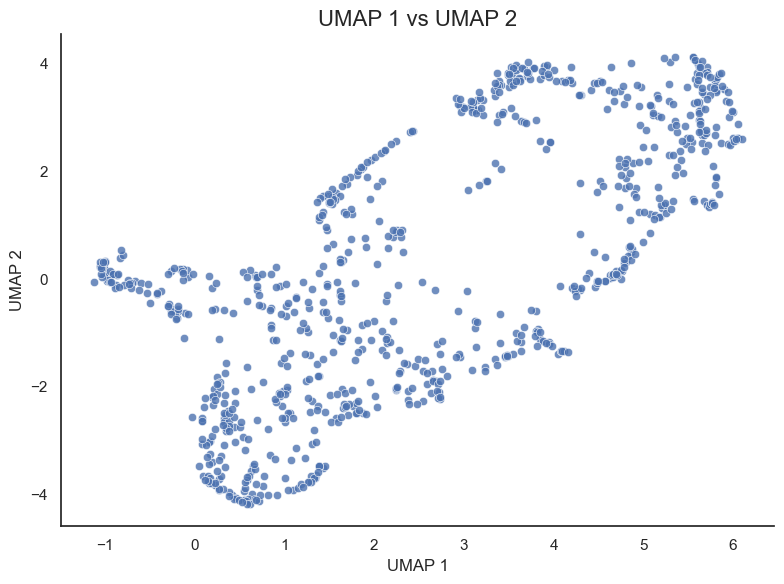

In [205]:
reducer = umap.UMAP(
            n_neighbors=30,
            min_dist=0.0,
            n_components=2,
            random_state=42,
)

embedding = reducer.fit_transform(df)
occ_codes = df.index.tolist()
occ_names = [occ_code_dict[occ] for occ in occ_codes]

# Determine the number of UMAP components
n_components = embedding.shape[1]
# Create all possible pairs of components
components_combinations = list(combinations(range(n_components), 2))

# Create subplots
if n_components > 2:
    fig, axes = plt.subplots((len(components_combinations) + 1) // 2, 2, figsize=(8 * ((len(components_combinations) + 1) // 2), 12))
    axes = axes.flatten()
else:
    fig, axes = plt.subplots(1, 1, figsize=(8, 6))
    axes = [axes]

# Plot each combination
for ax, (i, j) in zip(axes, components_combinations):
    sns.scatterplot(
        x=embedding[:, i],
        y=embedding[:, j],
        ax=ax,
        alpha=0.8,
        legend=False
    )
    ax.set_title(f'UMAP {i + 1} vs UMAP {j + 1}', fontsize=16)
    ax.set_xlabel(f'UMAP {i + 1}')
    ax.set_ylabel(f'UMAP {j + 1}')
    sns.despine(ax=ax)

plt.tight_layout()
plt.show()

# 4. Clustering with HDBSCAN

Robust density-based clustering that handles variable density clusters:

In [225]:
from sklearn.cluster import HDBSCAN

hdb = HDBSCAN(  
                min_samples=10,
                min_cluster_size=5,
                max_cluster_size = 30,
                store_centers = "medoid",
                cluster_selection_method = "leaf"
)
hdb.fit(embedding)

medoid_codes = []
medoid_names = []
for medoid in hdb.medoids_:
    idx = next((i for i, elem in enumerate(embedding) if np.array_equal(medoid, elem)), None)
    if idx is not None:
        medoid_codes.append(occ_codes[idx])
        medoid_names.append(occ_code_dict[occ_codes[idx]])
        print(f"{occ_codes[idx]} : {occ_names[idx]}")

17-2151.00 : Mining and Geological Engineers, Including Mining Safety Engineers
31-2011.00 : Occupational Therapy Assistants
11-3051.02 : Geothermal Production Managers
33-3031.00 : Fish and Game Wardens
41-2022.00 : Parts Salespersons
29-1141.03 : Critical Care Nurses
29-1215.00 : Family Medicine Physicians
39-3093.00 : Locker Room, Coatroom, and Dressing Room Attendants
45-2021.00 : Animal Breeders
19-1029.03 : Geneticists
51-7042.00 : Woodworking Machine Setters, Operators, and Tenders, Except Sawing
51-4033.00 : Grinding, Lapping, Polishing, and Buffing Machine Tool Setters, Operators, and Tenders, Metal and Plastic
49-9099.01 : Geothermal Technicians
49-9021.00 : Heating, Air Conditioning, and Refrigeration Mechanics and Installers
47-2221.00 : Structural Iron and Steel Workers
49-9095.00 : Manufactured Building and Mobile Home Installers
29-1223.00 : Psychiatrists
25-1194.00 : Career/Technical Education Teachers, Postsecondary
25-9042.00 : Teaching Assistants, Preschool, Elementa

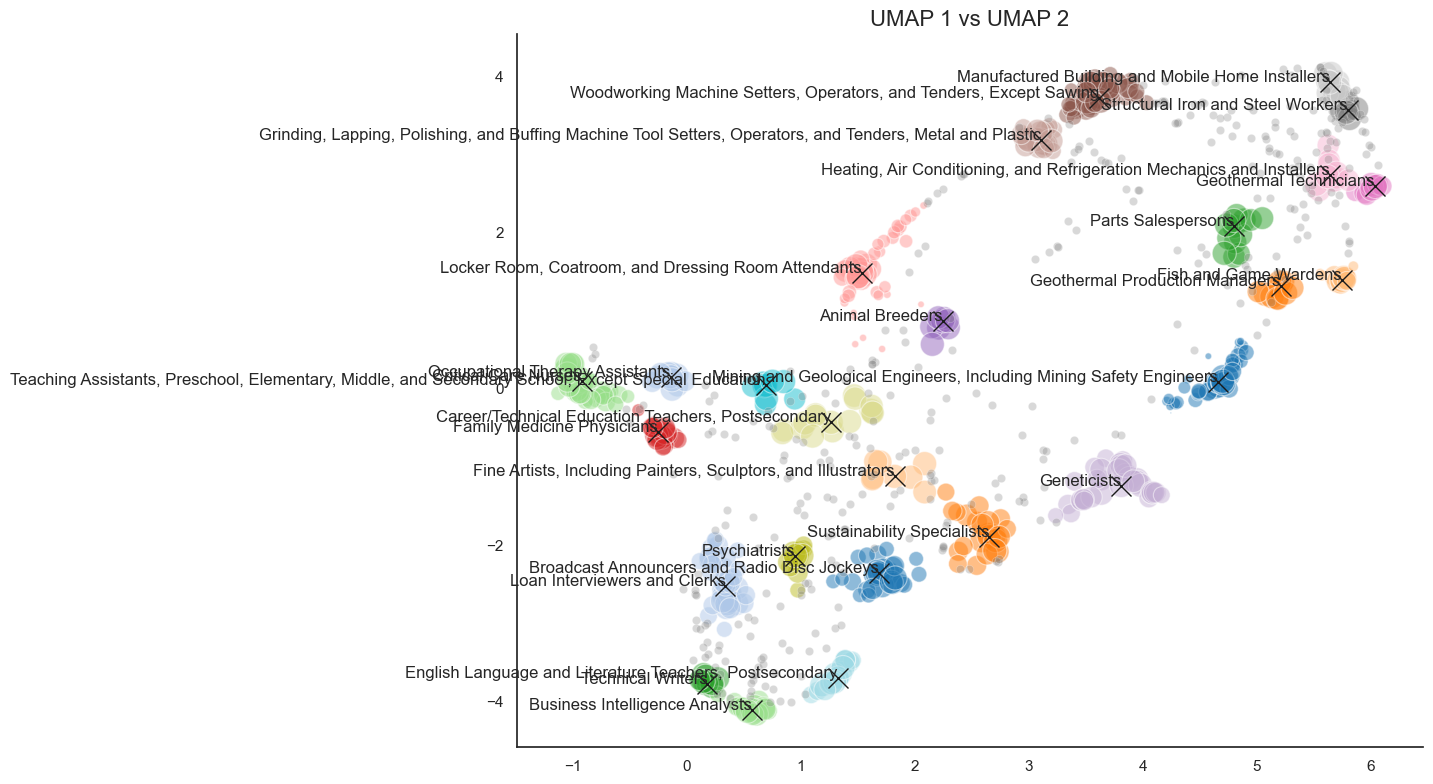

In [226]:
# Create a color palette with distinct colors
palette = sns.color_palette("tab20", len(set(hdb.labels_)) - 1)
palette = [(0.5, 0.5, 0.5)] + palette  # Add grey color for label -1

# Create subplots
if n_components > 2:
    fig, axes = plt.subplots((len(components_combinations) + 1) // 2, 2, figsize=(8 * ((len(components_combinations) + 1) // 2), 12))
    axes = axes.flatten()
else:
    fig, axes = plt.subplots(1, 1, figsize=(14, 8))
    axes = [axes]

# Plot each combination
for ax, (i, j) in zip(axes, components_combinations):
    sns.scatterplot(
        x=embedding[hdb.labels_ != -1, i],
        y=embedding[hdb.labels_ != -1, j],
        hue=hdb.labels_[hdb.labels_ != -1],
        size=hdb.probabilities_[hdb.labels_ != -1],
        sizes=(1, 300),  # Specify the min and max size
        palette=palette[1:],  # Skip first (gray) color
        ax=ax,
        alpha=0.5,
        legend=False
    )
    # Plot noise points separately with lower alpha
    sns.scatterplot(
        x=embedding[hdb.labels_ == -1, i],
        y=embedding[hdb.labels_ == -1, j],
        color='gray',
        ax=ax,
        alpha=0.3
    )


    # Add medoids to the plot
    for medoid, name in zip(hdb.medoids_, medoid_names):
        ax.plot(medoid[i], medoid[j], 'kx', markersize=15)
        ax.text(medoid[i], medoid[j], name, fontsize=12, ha='right')

    ax.set_title(f'UMAP {i + 1} vs UMAP {j + 1}', fontsize=16)
    # ax.set_xlabel(f'UMAP {i + 1}')
    # ax.set_ylabel(f'UMAP {j + 1}')
    sns.despine(ax=ax)



plt.tight_layout()
plt.show()

In [227]:
# Create a dictionary to map clusters to occupation titles
cluster_dict = {label: [] for label in hdb.labels_ if label >= 0}
for (idx, label) in enumerate(hdb.labels_):
    if label >= 0:
        cluster_dict[label].append(occ_codes[idx])

for label, occs in cluster_dict.items():
    print(f"Cluster {label} Menoid: {medoid_codes[label]} : {medoid_names[label]}")
    print(f"\tOccupations:")
    for occ in occs:
        print(f"\t\t{occ} : {occ_code_dict[occ]}")

Cluster 22 Menoid: 13-1199.05 : Sustainability Specialists
	Occupations:
		11-1011.03 : Chief Sustainability Officers
		11-3071.04 : Supply Chain Managers
		11-9041.00 : Architectural and Engineering Managers
		11-9141.00 : Property, Real Estate, and Community Association Managers
		11-9199.10 : Wind Energy Development Managers
		13-1023.00 : Purchasing Agents, Except Wholesale, Retail, and Farm Products
		13-1051.00 : Cost Estimators
		13-1081.00 : Logisticians
		13-1081.01 : Logistics Engineers
		13-1111.00 : Management Analysts
		13-1199.05 : Sustainability Specialists
		15-1212.00 : Information Security Analysts
		17-1012.00 : Landscape Architects
		17-2061.00 : Computer Hardware Engineers
		17-2171.00 : Petroleum Engineers
		17-2199.10 : Wind Energy Engineers
		17-3013.00 : Mechanical Drafters
		19-1041.00 : Epidemiologists
		19-2021.00 : Atmospheric and Space Scientists
		19-2041.00 : Environmental Scientists and Specialists, Including Health
		19-2041.03 : Industrial Ecologists


In [229]:
# Create a dictionary to map clusters to occupation titles
cluster_dict = {label: [] for label in hdb.labels_ if label >= 0}
for (idx, label) in enumerate(hdb.labels_):
    if label >= 0:
        cluster_dict[label].append(
            (occ_codes[idx], hdb.probabilities_[idx])
            )

for label, el in cluster_dict.items():
    occs, prob = zip(*el)
    print(f"Cluster {label} Menoid: {medoid_codes[label]} : {medoid_names[label]}")
    print(f"\tOccupations:")
    for occ, prob in zip(occs, prob):
        if prob == 1:
            print(f"\t\t{occ} : {occ_code_dict[occ]}")

Cluster 22 Menoid: 13-1199.05 : Sustainability Specialists
	Occupations:
		11-1011.03 : Chief Sustainability Officers
		11-9199.10 : Wind Energy Development Managers
		13-1199.05 : Sustainability Specialists
		17-2199.10 : Wind Energy Engineers
		19-2041.03 : Industrial Ecologists
Cluster 20 Menoid: 27-3011.00 : Broadcast Announcers and Radio Disc Jockeys
	Occupations:
		11-2011.00 : Advertising and Promotions Managers
		13-1131.00 : Fundraisers
		27-2012.00 : Producers and Directors
		27-3011.00 : Broadcast Announcers and Radio Disc Jockeys
		41-9021.00 : Real Estate Brokers
Cluster 2 Menoid: 11-3051.02 : Geothermal Production Managers
	Occupations:
		11-3051.02 : Geothermal Production Managers
		11-3051.04 : Biomass Power Plant Managers
		11-3051.06 : Hydroelectric Production Managers
		11-9021.00 : Construction Managers
		47-4011.00 : Construction and Building Inspectors
Cluster 7 Menoid: 39-3093.00 : Locker Room, Coatroom, and Dressing Room Attendants
	Occupations:
		35-9031.00 : H

(1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9402856404099235,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9544767193474264,
 0.9544767193474264,
 0.9544767193474264,
 0.9119901886730967,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9972181495878173,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9433029925904447,
 0.9214149714198229,
 0.9544767193474264,
 0.9544767193474264,
 0.8955981418523985,
 0.9544767193474264,
 0.9544767193474264,
 0.9124911234403058,
 0.9690559000820012,
 0.9176175398242461,
 1.0,
 0.9091128327688985,
 0.9544767193474264,
 0.9544767193474264)

In [216]:
# Calculate silhouette score
from sklearn.metrics import silhouette_score
score = silhouette_score(embedding, hdb.labels_)
print(f"Silhouette Score: {score:.2f}")

Silhouette Score: 0.15
